
Pivot Table (Yes, No Responses):
Do you *currently* have a mental health disorder?  No  Yes
What is your gender?                                      
female                                             18   49
male                                               74   76


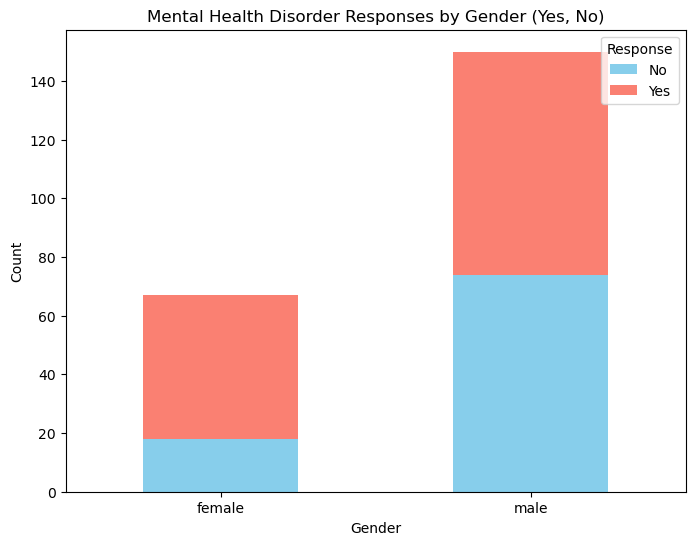

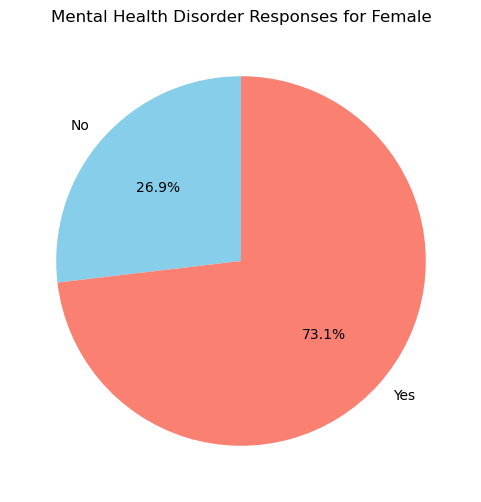

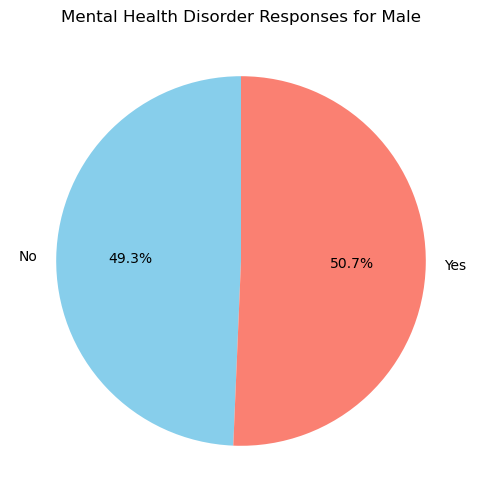

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('resource/2019 mental health data.csv')

# Handle missing values and normalize gender entries
data['What is your gender?'] = data['What is your gender?'].str.strip().str.lower().replace({
    'm': 'male',
    'male': 'male',
    'f': 'female',
    'female': 'female',
    'other': 'other'
})

# Drop rows with missing gender or mental health disorder information
data = data.dropna(subset=['What is your gender?', 'Do you *currently* have a mental health disorder?'])

# Filter for only male and female genders
data = data[data['What is your gender?'].isin(['male', 'female'])]

# Filter rows where the response is "Yes" or "No"
valid_responses = ['Yes', 'No']
data = data[data['Do you *currently* have a mental health disorder?'].isin(valid_responses)]

# Group by gender and the filtered mental health disorder responses
grouped_data = data.groupby(['What is your gender?', 'Do you *currently* have a mental health disorder?']).size()

# Reset index to make it easier to work with
grouped_data = grouped_data.reset_index(name='Count')


# Create a pivot table for cleaner summary
pivot_table = grouped_data.pivot(index='What is your gender?', columns='Do you *currently* have a mental health disorder?', values='Count').fillna(0)

# Print the pivot table
print("\nPivot Table (Yes, No Responses):")
print(pivot_table)

# Bar plot visualization
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Mental Health Disorder Responses by Gender (Yes, No)')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Pie Chart Visualization (Separate by Gender)
for gender in pivot_table.index:
    pivot_table.loc[gender].plot(
        kind='pie',
        figsize=(6, 6),
        title=f'Mental Health Disorder Responses for {gender.capitalize()}',
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'salmon']  # Consistent with bar plot colors
    )
    plt.ylabel('')
    plt.show()
